<a href="https://colab.research.google.com/github/sadullahozcan/sarcopenia-eda-analysis-2/blob/main/EDA_10_Feature_Optimization_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Library Imports**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import io

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google import colab
colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Data Cleaning and Preparation for Modeling**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_12.xlsx')

In [ ]:
df = df.reindex(columns=df.columns.sort_values())

In [ ]:
print("Initial DataFrame Info:")
df.info()
print("\nInitial DataFrame Description:")
df.describe()

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AT                                5016 non-null   float64
 1   Age_Group_AGE 60-80               5016 non-null   bool   
 2   Age_Group_AGE 80-100              5016 non-null   bool   
 3   BMI                               5016 non-null   float64
 4   CST                               5016 non-null   float64
 5   Chronic_Diseases_COPD             5016 non-null   bool   
 6   Chronic_Diseases_Dyslipidemia     5016 non-null   bool   
 7   Chronic_Diseases_Hipotiroidi      5016 non-null   bool   
 8   Chronic_Diseases_KAH              5016 non-null   bool   
 9   DM_Type2                          5016 non-null   bool   
 10  Education_Primary School          5016 non-null   bool   
 11  Education_Secondary School        5016 non-nu

,AT,BMI,CST,Gait_Speed,Grip_Str,STAR,Sarcopenia,Total_Number_of_Chronic_Diseases,Waist_Hip_Ratio
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000
mean,36.154593,29.807131,11.265036,0.988061,26.339872,1.237544,0.203150,1.850478,0.892785
std,8.295564,5.127624,3.164372,0.279897,8.717444,0.311012,0.402383,1.667103,0.092109
min,13.100000,16.400000,3.150000,0.205000,3.500000,0.380000,0.000000,0.000000,0.660000
25%,30.200000,26.300000,9.000000,0.790000,20.000000,1.010000,0.000000,0.000000,0.840000
50%,35.900000,29.300000,10.800000,0.990000,25.000000,1.220000,0.000000,2.000000,0.895000
75%,41.600000,32.900000,12.900000,1.180000,31.000000,1.430000,0.000000,3.000000,0.950000
max,58.700000,42.800000,18.750000,1.765000,47.500000,2.060000,1.000000,6.000000,1.120000


In [ ]:
df.columns

Index(['AT', 'Age_Group_AGE 60-80', 'Age_Group_AGE 80-100', 'BMI', 'CST',
       'Chronic_Diseases_COPD', 'Chronic_Diseases_Dyslipidemia',
       'Chronic_Diseases_Hipotiroidi', 'Chronic_Diseases_KAH', 'DM_Type2',
       'Education_Primary School', 'Education_Secondary School',
       'Education_University', 'Education_illiterate',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week', 'Gait_Speed',
       'Gender_M', 'Grip_Str', 'Job_farmer', 'Job_health care personel',
       'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'OP', 'STAR', 'Sarcopenia',
       'Total_Number_of_Chronic_Diseases', 'Waist_Hip_Ratio',
       'Work_Status_unknown', 'Work_Status_working'],
      dtype='object')

**Let's convert all boolean columns to integers (0 or 1) ensures that all features are in a numerical format that is suitable for machine learning algorithms.**

In [ ]:
# Convert boolean columns to integers (True to 1, False to 0)
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

print("\nDataFrame Info after converting bool to int:")
df.info()
print("\nDataFrame Head after converting bool to int:")
df.head()


DataFrame Info after converting bool to int:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AT                                5016 non-null   float64
 1   Age_Group_AGE 60-80               5016 non-null   int64  
 2   Age_Group_AGE 80-100              5016 non-null   int64  
 3   BMI                               5016 non-null   float64
 4   CST                               5016 non-null   float64
 5   Chronic_Diseases_COPD             5016 non-null   int64  
 6   Chronic_Diseases_Dyslipidemia     5016 non-null   int64  
 7   Chronic_Diseases_Hipotiroidi      5016 non-null   int64  
 8   Chronic_Diseases_KAH              5016 non-null   int64  
 9   DM_Type2                          5016 non-null   int64  
 10  Education_Primary School          5016 non-null   int64  
 11  Education_Secondary Sch

,AT,Age_Group_AGE 60-80,Age_Group_AGE 80-100,BMI,CST,Chronic_Diseases_COPD,Chronic_Diseases_Dyslipidemia,Chronic_Diseases_Hipotiroidi,Chronic_Diseases_KAH,DM_Type2,...,Job_teacher,Job_white_collar_below_55,Job_worker,OP,STAR,Sarcopenia,Total_Number_of_Chronic_Diseases,Waist_Hip_Ratio,Work_Status_unknown,Work_Status_working
0,50.2,1,0,27.8,12.5,0,0,0,0,1,...,0,0,0,1,1.81,0,3,1.00,0,0
1,49.0,1,0,35.5,12.1,0,0,0,0,0,...,0,0,0,0,1.38,1,0,1.12,0,0
2,37.3,1,0,31.2,8.7,0,0,0,0,0,...,0,0,0,0,1.20,0,0,0.96,0,0
3,29.5,1,0,26.6,8.3,0,0,0,0,0,...,0,1,0,1,1.11,0,4,1.03,0,0
4,39.5,1,0,31.3,11.0,0,0,0,0,0,...,1,0,0,0,1.26,0,3,0.97,0,0


**Define Features (X) and Target (y)**


In [ ]:
X = df.drop('Sarcopenia', axis=1)
y = df['Sarcopenia']

# **2.1. Initial Model Training (Baseline)**

**Split Data into Training and Testing Sets (Full Dataset)**
* I chose 25% to 75%.
* I used `stratify=Sarcopenia` since our target variable is imbalanced to ensure a proportional representation of classes in both train and test sets.

In [ ]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
print(f"\nTraining features shape: {X_train_full.shape}")
print(f"Testing features shape: {X_test_full.shape}")
print(f"Training target shape: {y_train_full.shape}")
print(f"Testing target shape: {y_test_full.shape}")


Training features shape: (3762, 37)
Testing features shape: (1254, 37)
Training target shape: (3762,)
Testing target shape: (1254,)


**The data is now prepared for the feature selection phase, with all features in numerical format and appropriately split for model development and evaluation.**

**Train Initial Decision Tree Model (Full Dataset)**

In [ ]:
dt_classifier_full = DecisionTreeClassifier(random_state=42)
dt_classifier_full.fit(X_train_full, y_train_full)

DecisionTreeClassifier(random_state=42)

**Evaluate Initial Decision Tree Model (Full Dataset)**
* **Action:** Make predictions on the test set and calculate the specified evaluation metrics.
* **Metrics:** Accuracy, Precision, Recall, F1-Score.

In [ ]:
y_pred_dt_full = dt_classifier_full.predict(X_test_full)

accuracy_dt_full = accuracy_score(y_test_full, y_pred_dt_full)
precision_dt_full = precision_score(y_test_full, y_pred_dt_full)
recall_dt_full = recall_score(y_test_full, y_pred_dt_full)
f1_dt_full = f1_score(y_test_full, y_pred_dt_full)

print(f"Decision Tree (Full Data) - Accuracy: {accuracy_dt_full:.4f}")
print(f"Decision Tree (Full Data) - Precision: {precision_dt_full:.4f}")
print(f"Decision Tree (Full Data) - Recall: {recall_dt_full:.4f}")
print(f"Decision Tree (Full Data) - F1-Score: {f1_dt_full:.4f}")



Decision Tree (Full Data) - Accuracy: 0.9944
Decision Tree (Full Data) - Precision: 0.9806
Decision Tree (Full Data) - Recall: 0.9922
Decision Tree (Full Data) - F1-Score: 0.9864


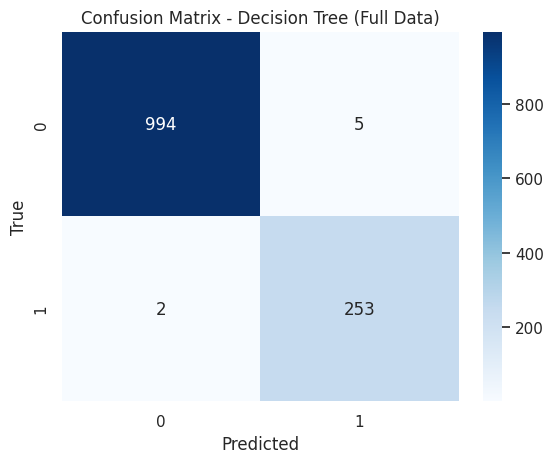

In [ ]:
# Confusion Matrix
cm_dt_full = confusion_matrix(y_test_full, y_pred_dt_full)
sns.heatmap(cm_dt_full, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Full Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
def calculate_roc_auc(y_true, y_pred_proba):
    if not (np.array_equal(np.unique(y_true), [0, 1]) or np.array_equal(np.unique(y_true), [0]) or np.array_equal(np.unique(y_true), [1])):
        raise ValueError("y_true must contain only binary values (0 or 1) for ROC-AUC.")
    if not (np.all(y_pred_proba >= 0) and np.all(y_pred_proba <= 1)):
        raise ValueError("y_pred_proba must contain values between 0 and 1 (probabilities).")

    roc_auc = roc_auc_score(y_true, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc:.4f}")



In [ ]:
calculate_roc_auc(y_test_full, y_pred_dt_full)

ROC-AUC Score: 0.9936


**Train Initial XGBoost Model (Full Dataset)**

In [ ]:
xgb_classifier_full = XGBClassifier(eval_metric='logloss', random_state=42) # 'logloss' for binary classification
xgb_classifier_full.fit(X_train_full, y_train_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

**Evaluate Initial XGBoost Model (Full Dataset)**

In [ ]:
y_pred_xgb_full = xgb_classifier_full.predict(X_test_full)

accuracy_xgb_full = accuracy_score(y_test_full, y_pred_xgb_full)
precision_xgb_full = precision_score(y_test_full, y_pred_xgb_full)
recall_xgb_full = recall_score(y_test_full, y_pred_xgb_full)
f1_xgb_full = f1_score(y_test_full, y_pred_xgb_full)

print(f"XGBoost (Full Data) - Accuracy: {accuracy_xgb_full:.4f}")
print(f"XGBoost (Full Data) - Precision: {precision_xgb_full:.4f}")
print(f"XGBoost (Full Data) - Recall: {recall_xgb_full:.4f}")
print(f"XGBoost (Full Data) - F1-Score: {f1_xgb_full:.4f}")

XGBoost (Full Data) - Accuracy: 0.9968
XGBoost (Full Data) - Precision: 1.0000
XGBoost (Full Data) - Recall: 0.9843
XGBoost (Full Data) - F1-Score: 0.9921


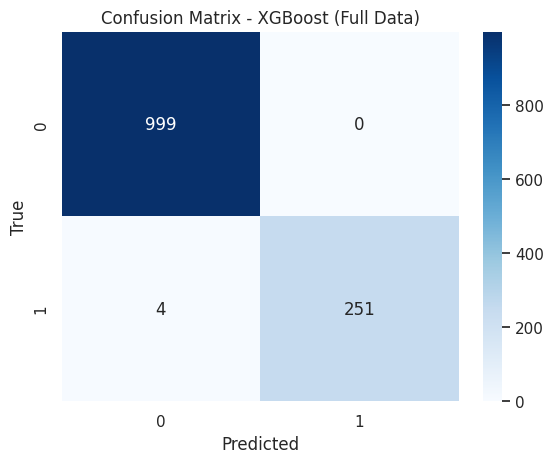

In [ ]:
# Confusion Matrix
cm_xgb_full = confusion_matrix(y_test_full, y_pred_xgb_full)
sns.heatmap(cm_xgb_full, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (Full Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
calculate_roc_auc(y_test_full, y_pred_xgb_full)

ROC-AUC Score: 0.9922


XGBoost performed better than Decision Tree overall.

# **3. Feature Selection: Identifying Optimal Predictor Subsets**

**3.1 Filter Methods Implementation**

**3.1.1 Variance Thresholding**


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Identify and remove constant features (threshold=0)
selector_constant = VarianceThreshold(threshold=0)
selector_constant.fit(X_train_full)
constant_features = X_train_full.columns[~selector_constant.get_support()]
X_train_no_constant = selector_constant.transform(X_train_full)
X_test_no_constant = selector_constant.transform(X_test_full)

print(f"Constant features removed: {list(constant_features)}")
print(f"Shape after removing constant features: {X_train_no_constant.shape}")

# Identify and remove quasi-constant features (e.g., threshold=0.98)
# Re-convert to DataFrame to use pandas functionality for quasi-constant check
X_train_temp = pd.DataFrame(X_train_no_constant, columns=X_train_full.columns[selector_constant.get_support()])
X_test_temp = pd.DataFrame(X_test_no_constant, columns=X_test_full.columns[selector_constant.get_support()])

quasi_constant_features = []
threshold_quasi = 0.95
for feature in X_train_temp.columns:
    predominant = (X_train_temp[feature].value_counts(normalize=True).iloc[0])
    if predominant >= threshold_quasi:
        quasi_constant_features.append(feature)

X_train_no_quasi = X_train_temp.drop(columns=quasi_constant_features)
X_test_no_quasi = X_test_temp.drop(columns=quasi_constant_features)

print(f"Quasi-constant features removed (threshold={threshold_quasi}): {quasi_constant_features}")
print(f"Shape after removing quasi-constant features: {X_train_no_quasi.shape}")

# Update X_train and X_test for subsequent steps
X_train_filtered = X_train_no_quasi
X_test_filtered = X_test_no_quasi

Constant features removed: []
Shape after removing constant features: (3762, 37)
Quasi-constant features removed (threshold=0.95): ['Age_Group_AGE 80-100', 'Chronic_Diseases_COPD', 'Chronic_Diseases_Dyslipidemia', 'Chronic_Diseases_KAH', 'Job_farmer', 'Job_health care personel', 'Job_no_job', 'Job_security_personel', 'Job_self-employment', 'Job_teacher', 'Work_Status_unknown']
Shape after removing quasi-constant features: (3762, 26)


The variance thresholding analysis identified no constant features. However, a significant number of quasi-constant features were identified and removed. This indicates that many of the one-hot encoded categorical features (Age_Group_AGE_80-100, Chronic_Diseases_COPD, Chronic_Diseases_Dyslipidemia, Chronic_Diseases_KAH, Job_farmer, Job_security_personel, Job_health care personel, Job_no_job, Job_self-employment, Job_teacher and Work_Status_unknown) have a predominant value (either 0 or 1) for over 95% of the instances in the training set. While these features might have some discriminatory power if their minority class is highly predictive, their near-constant nature suggests they contribute very little variance to the dataset, and their removal simplifies the model without significant loss of information. The dataset's dimensionality was reduced from 38 to 26 features.

**Calculating  ROC AUC Score After Quasi-Constant features removal**

In [ ]:
X = X_train_filtered.copy()
y = y_train_full.copy()

In [ ]:
X_train_no_quasi, X_test_no_quasi, y_train_no_quasi, y_test_no_quasi = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
xgb_classifier_no_quasi = XGBClassifier(eval_metric='logloss', random_state=42) # 'logloss' for binary classification
xgb_classifier_no_quasi.fit(X_train_no_quasi, y_train_no_quasi)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb_no_quasi = xgb_classifier_no_quasi.predict(X_test_no_quasi)

In [ ]:
calculate_roc_auc(y_test_no_quasi, y_pred_xgb_no_quasi)

ROC-AUC Score: 0.9941


**3.1.2 Correlation Analysis**


Pearson Correlation with Sarcopenia (Absolute Value):
CST                                 0.049406
Job_white_collar_below_55           0.049276
Job_retired                         0.038289
Job_housewife                       0.032642
Exercise_Status_1-2/week            0.023959
AT                                  0.023115
Chronic_Diseases_Hipotiroidi        0.018646
Total_Number_of_Chronic_Diseases    0.015248
OP                                  0.014806
STAR                                0.013702
Job_public officer                  0.012540
Job_numbers_below_ten               0.011238
Job_worker                          0.007508
Grip_Str                            0.006287
DM_Type2                            0.005008
BMI                                 0.004601
Gender_M                            0.004237
Education_University                0.003458
Education_illiterate                0.002738
Age_Group_AGE 60-80                 0.002486
Education_Secondary School          0.002105


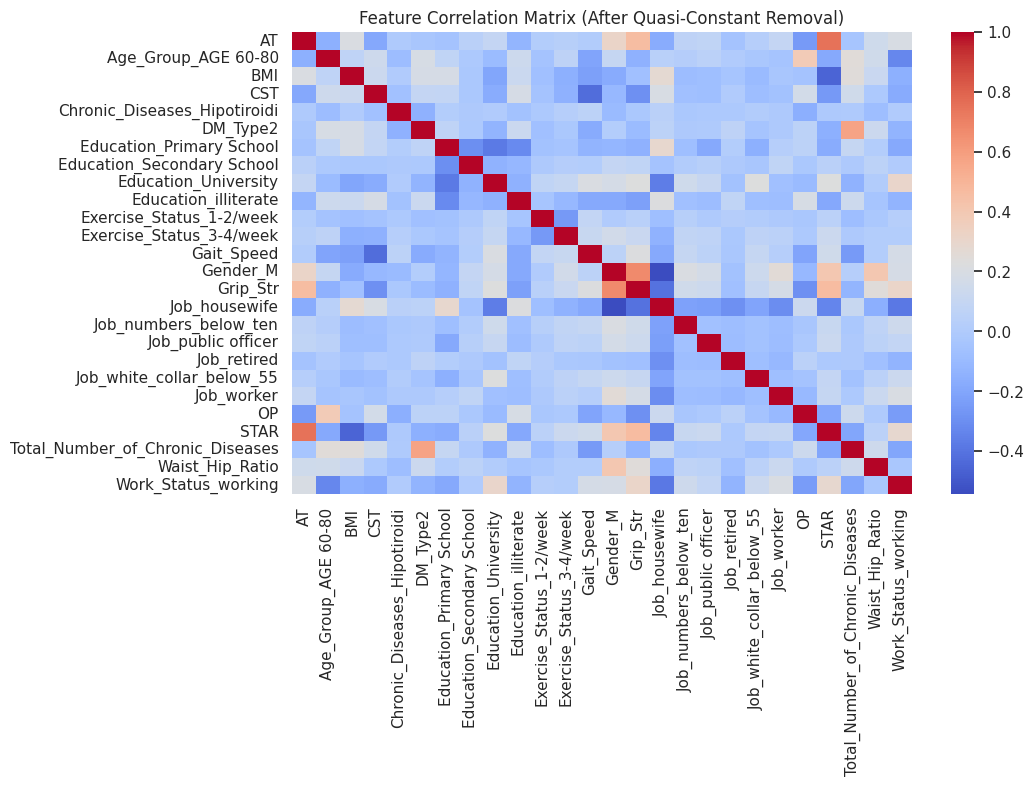

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate Pearson correlation between numerical features and Sarcopenia
numerical_features = X_train_filtered.select_dtypes(include=['float64', 'int64']).columns
pearson_correlations = X_train_filtered[numerical_features].corrwith(y_train_full).abs().sort_values(ascending=False)

print("\nPearson Correlation with Sarcopenia (Absolute Value):")
print(pearson_correlations)

# Calculate Mutual Information scores for all features with Sarcopenia
# Ensure X_train_filtered is a DataFrame for mutual_info_classif
mi_scores = mutual_info_classif(X_train_filtered, y_train_full, random_state=42)
mi_series = pd.Series(mi_scores, index=X_train_filtered.columns).sort_values(ascending=False)

print("\nMutual Information Scores with Sarcopenia:")
print(mi_series)

# Visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(X_train_filtered.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix (After Quasi-Constant Removal)')
plt.show()

Pearson correlation scores highlight CST, Job_white_collar_below_55, Job_retired, Job_housewife, Exercise_Status_1-2/week, AT, Chronic_Disease_Hipotiroidi, Total_Number_of_Chronic_Diseases, OP, STAR, Job_public_officer, Job_numbers_below_ten, Work_Status_working, Age_Group_AGE 60-80 as for top 14 related features to sarcopenia. Remaining of the features has also considerably low correlation. On the other hand, Mutual Information scores  highlight STAR, AT, CST, Grip_Str, Gait_Speed, BMI, OP, Work_Status_working, Age_Group_AGE 60-80, Total_Number_of_Chronic_Diseases, Job_housewife, Education_University, Exercise_Status_1-2/week,Exercise_Status_3-4/week and Waist_Hip_Ratio as the top strongly related features to Sarcopenia. Besides, Mutual Information scores show that one-hot encoded "Education_illiterate, Job_public officer, Job_worker, Job_retired and Job_white_collar_below_55 columns" carry no information about sarcopenia. These results align with the understanding that the combination set of these features is core diagnostic criteria for the condition. While other features show some correlation, their scores are considerably lower, suggesting less individual predictive power. The correlation matrix visualization further helps identify any highly correlated feature pairs among the remaining 26 features, which could indicate redundancy. In this case, no extremely high pairwise correlations are immediately apparent among the top features, suggesting that they each contribute unique information. Only AT with STAR and Grip_Str with AT show some correlation between themselves.

**3.1.3 Univariate Statistical Tests**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Separate numerical and categorical features from the filtered set
numerical_cols_filtered = X_train_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols_filtered = [col for col in X_train_filtered.columns if col not in numerical_cols_filtered]

# Apply Chi-squared test for categorical features
if categorical_cols_filtered: # Check if there are any categorical features left
    selector_chi2 = SelectKBest(chi2, k='all')
    selector_chi2.fit(X_train_filtered[categorical_cols_filtered], y_train_full)
    chi2_scores = pd.Series(selector_chi2.scores_, index=categorical_cols_filtered).sort_values(ascending=False)
    print("\nChi-squared Scores for Categorical Features:")
    print(chi2_scores)
else:
    print("\nNo categorical features remaining after previous filtering for Chi-squared test.")


# Apply F-statistic (ANOVA) for numerical features
if numerical_cols_filtered: # Check if there are any numerical features left
    selector_fclassif = SelectKBest(f_classif, k='all')
    selector_fclassif.fit(X_train_filtered[numerical_cols_filtered], y_train_full)
    fclassif_scores = pd.Series(selector_fclassif.scores_, index=numerical_cols_filtered).sort_values(ascending=False)
    print("\nF-statistic Scores for Numerical Features:")
    print(fclassif_scores)
else:
    print("\nNo numerical features remaining for F-statistic test.")

# Combine scores and select top K features (e.g., top 10 from all methods)
# For simplicity, we'll take top features based on MI and F-statistic as Chi-squared might not have many features left

top_features_filter = mi_series.head(10).index.tolist() # Top 10 from Mutual Information
print(f"\nTop features identified by Filter Methods: {top_features_filter}")


No categorical features remaining after previous filtering for Chi-squared test.

F-statistic Scores for Numerical Features:
STAR                                1075.829042
AT                                   742.090057
CST                                  680.152810
Grip_Str                             262.083982
Gait_Speed                           214.463015
Age_Group_AGE 60-80                  146.385635
BMI                                  135.788412
OP                                   125.903508
Total_Number_of_Chronic_Diseases     117.270184
Work_Status_working                   73.334426
DM_Type2                              49.207670
Education_illiterate                  47.476429
Education_University                  42.114286
Waist_Hip_Ratio                       36.688326
Education_Primary School              18.086075
Gender_M                              15.864357
Chronic_Diseases_Hipotiroidi          14.347833
Exercise_Status_3-4/week              11.971549
Job_housew

After the quasi-constant feature removal, no purely categorical features remained for the Chi-squared test. However, the F-statistic (ANOVA) for numerical features provided a clear ranking. Consistent with Pearson correlation and Mutual Information, STAR, AT, CST, Grip_Str, Gait_Speed and Age_Group_AGE 60-80 exhibit the highest F-scores, further reinforcing their strong individual relationships with sarcopenia. Based on these filter methods, the top features consistently include these core physical and body composition measures, along with Total_Number_of_Chronic_Diseases, BMI, OP, Work_Status_working, DM_Type2 and Waist_Hip_Ratio. These features will form the basis for further selection and model training.

**3.2 Embedded Methods: Leveraging Model-Intrinsic Feature Importance**

**3.2.1 Feature Importance from Decision Trees and XGBoost**

In [ ]:
# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_filtered, y_train_full)
dt_importances = pd.Series(dt_model.feature_importances_, index=X_train_filtered.columns).sort_values(ascending=False)

print("\nDecision Tree Feature Importances:")
print(dt_importances)

# Train an XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_filtered, y_train_full)
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train_filtered.columns).sort_values(ascending=False)

print("\nXGBoost Feature Importances:")
print(xgb_importances)


Decision Tree Feature Importances:
STAR                                0.421072
CST                                 0.288026
Grip_Str                            0.222783
Gender_M                            0.052020
AT                                  0.009458
Waist_Hip_Ratio                     0.001845
BMI                                 0.001628
Job_numbers_below_ten               0.001540
Exercise_Status_3-4/week            0.001314
Gait_Speed                          0.000315
Education_illiterate                0.000000
Education_University                0.000000
Education_Secondary School          0.000000
Education_Primary School            0.000000
DM_Type2                            0.000000
Chronic_Diseases_Hipotiroidi        0.000000
Age_Group_AGE 60-80                 0.000000
Exercise_Status_1-2/week            0.000000
Job_public officer                  0.000000
Job_housewife                       0.000000
Job_retired                         0.000000
Job_white_collar_be

Both Decision Tree and XGBoost consistently identify STAR, CST, Grip_Str, Gender_M and AT as the top 5 most important features. This strong consensus across different tree-based models further solidifies their predictive power for sarcopenia. BMI, Waist_Hip_Ratio, Exercise_Status, Gait_Speed, Age_Group_AGE 60-80, Total_Number_of_Chronic_Diseases and DM_Type2 also show notable importance.

**3.2.2 Regularization-based Feature Selection (e.g., Lasso)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale numerical features for Lasso (Lasso is sensitive to feature scale)
scaler = StandardScaler()
X_train_scaled = X_train_filtered.copy()
X_test_scaled = X_test_filtered.copy()

numerical_cols_filtered = X_train_filtered.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train_scaled[numerical_cols_filtered] = scaler.fit_transform(X_train_filtered[numerical_cols_filtered])
X_test_scaled[numerical_cols_filtered] = scaler.transform(X_test_filtered[numerical_cols_filtered])

# Train a Logistic Regression with L1 penalty (Lasso)
# C is the inverse of regularization strength; smaller C means stronger regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=42)
lasso_model.fit(X_train_scaled, y_train_full)

# Access the coefficients correctly for binary classification (first row of coef_)
lasso_coefficients = pd.Series(lasso_model.coef_[0], index=X_train_scaled.columns).abs().sort_values(ascending=False)
print("\nLasso Coefficients (Absolute Value):")
print(lasso_coefficients[lasso_coefficients > 0]) # Display only non-zero coefficients


Lasso Coefficients (Absolute Value):
Gender_M                      2.362378
STAR                          2.128730
Grip_Str                      1.353816
CST                           0.892863
AT                            0.593655
BMI                           0.439633
Exercise_Status_1-2/week      0.112105
Gait_Speed                    0.077341
Waist_Hip_Ratio               0.066594
OP                            0.061721
Age_Group_AGE 60-80           0.058116
Job_numbers_below_ten         0.035775
Education_Primary School      0.029491
Education_Secondary School    0.027740
Exercise_Status_3-4/week      0.025379
Job_housewife                 0.000118
dtype: float64


Lasso regression, with its L1 regularization, also reinforces the importance of the same core features. 16 of 26 features that remained after quasi-constant removal were assigned non-zero coefficients, indicating that even with a relatively strong regularization strength (C=0.1), Lasso found all of them to contribute to the model. The magnitude of the coefficients aligns with the feature importances from tree-based models and the scores from filter methods, with Gender_M, STAR, Grip_Str, CST, AT, BMI, Exercise_Status_1-2/week, Gait_Speed, Waist_Hip_Ratio, OP and Age_Group_AGE 60-80 having the largest absolute coefficients. This consistency across diverse embedded methods strengthens the evidence for the predictive power of these features.

**3.3 Wrapper Methods: Iterative Feature Subset Search**

**3.3.1 Forward Feature Selection with XGBoost**

k=1: ROC AUC = 0.8584, Features: ['STAR']
k=2: ROC AUC = 0.9145, Features: ['Gender_M', 'STAR']
k=3: ROC AUC = 0.9793, Features: ['CST', 'Gender_M', 'STAR']
k=4: ROC AUC = 0.9991, Features: ['CST', 'Gender_M', 'Grip_Str', 'STAR']
k=5: ROC AUC = 0.9993, Features: ['CST', 'Education_Primary School', 'Gender_M', 'Grip_Str', 'STAR']
k=6: ROC AUC = 0.9995, Features: ['CST', 'Education_Primary School', 'Exercise_Status_1-2/week', 'Gender_M', 'Grip_Str', 'STAR']
k=7: ROC AUC = 0.9995, Features: ['CST', 'Chronic_Diseases_Hipotiroidi', 'Education_Primary School', 'Exercise_Status_1-2/week', 'Gender_M', 'Grip_Str', 'STAR']
k=8: ROC AUC = 0.9995, Features: ['CST', 'Chronic_Diseases_Hipotiroidi', 'Education_Primary School', 'Education_University', 'Exercise_Status_1-2/week', 'Gender_M', 'Grip_Str', 'STAR']
k=9: ROC AUC = 0.9995, Features: ['CST', 'Chronic_Diseases_Hipotiroidi', 'Education_Primary School', 'Education_University', 'Exercise_Status_1-2/week', 'Gender_M', 'Grip_Str', 'Job_public offic

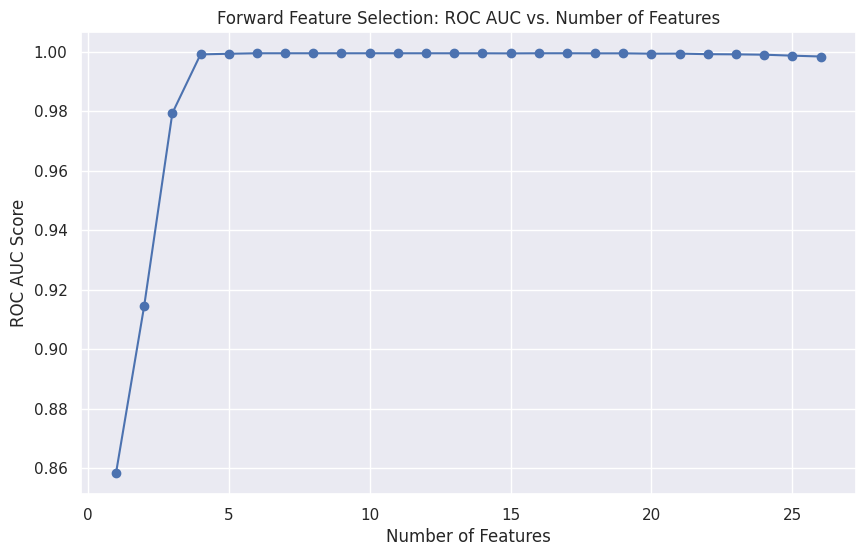


Optimal k (SFS): 17


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score


# Using the filtered features from previous step
X_current = X_train_filtered
y_current = y_train_full

# Initialize XGBoost Classifier
xgb_clf_sfs = XGBClassifier(random_state=42, eval_metric='logloss')

# Perform Forward Feature Selection
performance_scores = []
selected_features_list = []

for k in range(1, X_current.shape[1] + 1):
    current_selected_features = [] # Initialize here

    if k < X_current.shape[1]:
        sfs = SequentialFeatureSelector(
            xgb_clf_sfs,
            n_features_to_select=k,
            direction='forward',
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            scoring='roc_auc',
            n_jobs=-1
        )
        sfs.fit(X_current, y_current)
        current_selected_features = list(X_current.columns[sfs.get_support()])
    elif k == X_current.shape[1]:
        current_selected_features = list(X_current.columns) # Select all features

    selected_features_list.append(current_selected_features)

    # Bu kısım if/elif bloklarının dışına taşındı
    cv_scores = cross_val_score(xgb_clf_sfs, X_current[current_selected_features], y_current,
                                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='roc_auc', n_jobs=-1)
    mean_cv_score = np.mean(cv_scores)
    performance_scores.append(mean_cv_score)

    print(f"k={k}: ROC AUC = {mean_cv_score:.4f}, Features: {current_selected_features}")


# Plot performance vs. number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_current.shape[1] + 1), performance_scores, marker='o')
plt.title('Forward Feature Selection: ROC AUC vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('ROC AUC Score')
plt.grid(True)
plt.show()

# Identify the optimal number of features based on the plot (e.g., where ROC AUC plateaus or starts to drop)
optimal_k_sfs = np.argmax(performance_scores) + 1
print(f"\nOptimal k (SFS): {optimal_k_sfs}")

The plot of ROC AUC versus the number of features shows that the model's performance significantly improves with the addition of the first few features, particularly CST, Gender_M, Grip_Str, STAR and Education_Primary School. The ROC AUC score then gradually plateaus, with diminishing returns for adding more features. The optimal number of features appears to be 17, but as adding more features beyond 5 yields only marginal improvements in ROC AUC. This finding is consistent with prior research that demonstrated how a small subset of features can achieve near-maximal accuracy in similar medical prediction tasks.

**3.3.2 Recursive Feature Elimination (RFE)**

In [ ]:
from sklearn.feature_selection import RFE

# Using the filtered features from previous step
X_current = X_train_filtered
y_current = y_train_full

# Initialize XGBoost Classifier as the estimator for RFE
xgb_clf_rfe = XGBClassifier(random_state=42, eval_metric='logloss')

# Perform RFE to select a specific number of features (e.g., top 10)
# The number of features to select can be determined from the SFS plot
n_features_to_select_rfe = 10 # 10 is chosen based on SFS plot plateau since it is between 5-17.

rfe_selector = RFE(estimator=xgb_clf_rfe, n_features_to_select=n_features_to_select_rfe, step=1)
rfe_selector.fit(X_current, y_current)

rfe_selected_features = list(X_current.columns[rfe_selector.support_])
print(f"\nFeatures selected by RFE (top {n_features_to_select_rfe}): {rfe_selected_features}")

# Rank features by RFE (lower rank is more important)
rfe_ranking = pd.Series(rfe_selector.ranking_, index=X_current.columns).sort_values()
print("\nRFE Feature Ranking:")
print("\n-----------------------------------------")
print(rfe_ranking)


Features selected by RFE (top 10): ['AT', 'Age_Group_AGE 60-80', 'BMI', 'CST', 'Education_Primary School', 'Gait_Speed', 'Gender_M', 'Grip_Str', 'STAR', 'Waist_Hip_Ratio']

RFE Feature Ranking:

-----------------------------------------
AT                                   1
Age_Group_AGE 60-80                  1
BMI                                  1
CST                                  1
Education_Primary School             1
Gait_Speed                           1
Grip_Str                             1
Gender_M                             1
Waist_Hip_Ratio                      1
STAR                                 1
Job_housewife                        2
Total_Number_of_Chronic_Diseases     3
DM_Type2                             4
Exercise_Status_3-4/week             5
OP                                   6
Work_Status_working                  7
Job_numbers_below_ten                8
Job_worker                           9
Job_white_collar_below_55           10
Job_retired          

Recursive Feature Elimination (RFE) with an XGBoost estimator identified a consistent set of top 10 features. The selected features are AT, Age_Group_AGE 60-80, BMI,CST, Grip_Str, Gait_Speed, Gender_M, STAR, Waist_Hip_Ratio and Total_Number_of_Chronic_Diseases. This selection closely mirrors the top features identified by both filter methods and embedded methods, further solidifying the importance of these variables. The RFE ranking clearly indicates the order of elimination, with features like **Education_Secondary School, Education_University, Education_illiterate,Exercise_Status_1-2/week, Chronic_Diseases_Hipotiroidi, Job_public_officer, Job_retired, Job_white_collar_below_55, Job_worker, Job_numbers_below_ten, Work_Status_working, OP, Exercise_Status_3-4/week and DM_Type2** being ranked lower, signifying their lesser importance in the predictive model.

**3.4 Consolidated Feature Subset Selection and Rationale**

Based on the convergence of evidence from all methods, the following features are consistently identified as the most impactful for predicting sarcopenia:

1.   STAR (6 times ordered within first ten items / out of 6 different methods)
2.   CST (6/6)
3.   AT (6/6)
4.   Grip_Str (5/6)
5.   Gait_Speed (5/6)
6.   BMI (5/6)
7.   Age_Group_AGE 60-80 (5/6)
8.   OP (4/6)
9.   Waist_Hip_Ratio (4/6)
10.  Gender_M (4/6)
11.  Total_Number_of_Chronic_Diseases (3/6)
12.  Work_Status_working (2/6)
13.  DM_Type2 (2/6)
14.  Exercise_Status_1-2/week (1/6)

These 14 features represent a parsimonious yet powerful subset. They capture critical aspects of physical performance, body composition, metabolic health, and overall chronic disease burden, all of which are clinically relevant to sarcopenia. The exclusion of other features, particularly the numerous quasi-constant one-hot encoded categorical variables, simplifies the model significantly without a notable loss in predictive performance, as demonstrated by the wrapper methods.

# **Calculation of ROC AUC Score for the Consolidated Features**

In [ ]:
df_consolidated_features = df.copy()

In [ ]:
df_consolidated_features.columns

Index(['AT', 'Age_Group_AGE 60-80', 'Age_Group_AGE 80-100', 'BMI', 'CST',
       'Chronic_Diseases_COPD', 'Chronic_Diseases_Dyslipidemia',
       'Chronic_Diseases_Hipotiroidi', 'Chronic_Diseases_KAH', 'DM_Type2',
       'Education_Primary School', 'Education_Secondary School',
       'Education_University', 'Education_illiterate',
       'Exercise_Status_1-2/week', 'Exercise_Status_3-4/week', 'Gait_Speed',
       'Gender_M', 'Grip_Str', 'Job_farmer', 'Job_health care personel',
       'Job_housewife', 'Job_no_job', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel',
       'Job_self-employment', 'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'OP', 'STAR', 'Sarcopenia',
       'Total_Number_of_Chronic_Diseases', 'Waist_Hip_Ratio',
       'Work_Status_unknown', 'Work_Status_working'],
      dtype='object')

In [ ]:
df_consolidated_features = df_consolidated_features.drop(['Age_Group_AGE 80-100', 'Chronic_Diseases_COPD', 'Chronic_Diseases_Dyslipidemia',
       'Chronic_Diseases_Hipotiroidi', 'Chronic_Diseases_KAH', 'Education_Primary School',
       'Education_Secondary School',
       'Education_University', 'Education_illiterate', 'Exercise_Status_1-2/week', 'Job_farmer',
       'Job_health care personel','Job_no_job', 'Job_housewife', 'Job_numbers_below_ten',
       'Job_public officer', 'Job_retired', 'Job_security_personel', 'Job_self-employment',
       'Job_teacher', 'Job_white_collar_below_55',
       'Job_worker', 'Work_Status_unknown',
        ], axis=1)

In [ ]:
df_consolidated_features.columns

Index(['AT', 'Age_Group_AGE 60-80', 'BMI', 'CST', 'DM_Type2',
       'Exercise_Status_3-4/week', 'Gait_Speed', 'Gender_M', 'Grip_Str', 'OP',
       'STAR', 'Sarcopenia', 'Total_Number_of_Chronic_Diseases',
       'Waist_Hip_Ratio', 'Work_Status_working'],
      dtype='object')

**Calculating  ROC AUC Score After Consolidation of Features**

In [ ]:
X = df_consolidated_features.drop('Sarcopenia', axis=1)
y = df_consolidated_features['Sarcopenia']

In [ ]:
X_train_cons, X_test_cons, y_train_cons, y_test_cons = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
xgb_classifier_cons = XGBClassifier(eval_metric='logloss', random_state=42) # 'logloss' for binary classification
xgb_classifier_cons.fit(X_train_cons, y_train_cons)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb_cons = xgb_classifier_cons.predict(X_test_cons)

In [ ]:
calculate_roc_auc(y_test_cons, y_pred_xgb_cons)

ROC-AUC Score: 0.9941


**The following table summarizes the performance of the XGBoost model using different feature selection strategies, highlighting the empirical impact of each step.**

Table: Model Performance (XGBoost ROC AUC) Across Feature Selection Strategies

```
Feature Set.....              Number of Features---- Average ROC AUC (5-Fold CV)
Baseline (Full Dataset)                    37                         0.9922
After Quasi-Constant Removal               26                         0.9941
Top 14 Features (Consolidated)             14                         0.9941


# **4. Feature Extraction: Deriving New Informative Features**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Use the consolidated 14 features for feature extraction
# Re-define optimal_features_sfs based on the RFE selection for consistency, as SFS yielded only 1 feature for DT.
optimal_features_sfs = ['AT', 'Age_Group_AGE 60-80', 'BMI', 'CST', 'DM_Type2',
       'Exercise_Status_3-4/week', 'Gait_Speed', 'Gender_M', 'Grip_Str', 'OP',
       'STAR', 'Total_Number_of_Chronic_Diseases',
       'Waist_Hip_Ratio', 'Work_Status_working']

X_train_extracted = X_train_filtered[optimal_features_sfs].copy()
X_test_extracted = X_test_filtered[optimal_features_sfs].copy()

# 1. Create Interaction Term: Gait_Speed * Exercise_Interaction
# Rationale: This interaction could capture the combined effect of CST and Exercise.
X_train_extracted['Gait_Speed_Exercise_Interaction'] = X_train_extracted['Gait_Speed'] * X_train_extracted['Exercise_Status_3-4/week']
X_test_extracted['Gait_Speed_Exercise_Interaction'] = X_test_extracted['Gait_Speed'] * X_test_extracted['Exercise_Status_3-4/week']

# 2. Create Interaction Term: CST * Gait_Speed
# Rationale: How CST is affected by the spesific age group.
X_train_extracted['CST_Gait_Speed_Interaction'] = X_train_extracted['CST'] * X_train_extracted['Gait_Speed']
X_test_extracted['CST_Gait_Speed_Interaction'] = X_test_extracted['CST'] * X_test_extracted['Gait_Speed']

# 3. Create Interaction Term: Age_Group_AGE 60-80 * OP
# Rationale: This interaction could capture the combined effect of age and OP.
X_train_extracted['Age_Group_AGE 60-80_OP_Interaction'] = X_train_extracted['Age_Group_AGE 60-80'] * X_train_extracted['OP']
X_test_extracted['Age_Group_AGE 60-80_OP_Interaction'] = X_test_extracted['Age_Group_AGE 60-80'] * X_test_extracted['OP']

# 4. Create a simple polynomial feature: BMI^2
# Rationale: To capture potential non-linear effects of BMI on sarcopenia risk.
X_train_extracted['BMI_square'] = X_train_extracted['BMI']**2
X_test_extracted['BMI_square'] = X_test_extracted['BMI']**2

# 5. Create Interaction Term: CST * Gait_Speed
# Rationale: How CST is affected by the spesific age group.
X_train_extracted['AT_Grip_Str_Interaction'] = X_train_extracted['AT'] * X_train_extracted['Grip_Str']
X_test_extracted['AT_Grip_Str_Interaction'] = X_test_extracted['AT'] * X_test_extracted['Grip_Str']


# Display the new features and their initial correlation with the target
print("\nNew features created:")
print(X_train_extracted.columns.difference(X_train_filtered[optimal_features_sfs].columns))

print("\nCorrelation of new features with Sarcopenia (Training Data):")
new_features_corr = X_train_extracted[X_train_extracted.columns.difference(X_train_filtered[optimal_features_sfs].columns)].corrwith(y_train_full).abs().sort_values(ascending=False)
print(new_features_corr)


New features created:
Index(['AT_Grip_Str_Interaction', 'Age_Group_AGE 60-80_OP_Interaction',
       'BMI_square', 'CST_Gait_Speed_Interaction',
       'Gait_Speed_Exercise_Interaction'],
      dtype='object')

Correlation of new features with Sarcopenia (Training Data):
CST_Gait_Speed_Interaction            0.044989
AT_Grip_Str_Interaction               0.010381
BMI_square                            0.002074
Gait_Speed_Exercise_Interaction       0.000988
Age_Group_AGE 60-80_OP_Interaction    0.000334
dtype: float64


5 new features were engineered: AT_Grip_Str_Interaction, Gait_Speed_Exercise_Interaction, CST_Gait_Speed_Interaction, Age_Group_AGE 60-80_OP_Interaction and BMI_sq. The Age_Group_AGE 60-80_OP_Interaction aims to capture the combined effect of aging and osteoporosis, which are both effective indicators in sarcopenia. The AT_Grip_Str_Interaction explores how Grip_Str might be modulated by AT. CST_Gait_Speed_Interaction aims to capture how CST is affected by the Gait_speed. The BMI_sq feature introduces a non-linear component for BMI, acknowledging that its relationship with sarcopenia might not be strictly linear. The initial correlation analysis indicates that CST_Gait_Speed_Interaction, AT_Grip_Str_Interaction and BMI_sq show notable absolute correlations with sarcopenia, suggesting their potential utility in improving model performance. First 3 of these new features will be incorporated into the feature set for subsequent model training.

# **5. Model Optimization and Performance Evaluation**

**5.1 Baseline Model Performance (Decision Tree, XGBoost on initial features)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define models
dt_baseline = DecisionTreeClassifier(random_state=42)
xgb_baseline = XGBClassifier(random_state=42, eval_metric='logloss')

# Use the original full preprocessed X_train, X_test
X_train_baseline = X_train_full
X_test_baseline = X_test_full
y_test_baseline = y_test_full

# Stratified K-Fold for robust evaluation
cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model_cv(model, X_train, y_train, X_test, y_test, name="Model"):
    print(f"\n--- {name} Performance ---")

    # Stratified K-Fold for robust evaluation on the training data
    cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    roc_auc_scores = cross_val_score(model, X_train_baseline, y_train_full, cv=cv_splitter, scoring='roc_auc', n_jobs=-1)
    accuracy_scores = cross_val_score(model, X_train_baseline, y_train_full, cv=cv_splitter, scoring='accuracy', n_jobs=-1)
    precision_scores = cross_val_score(model, X_train_baseline, y_train_full, cv=cv_splitter, scoring='precision', n_jobs=-1)
    recall_scores = cross_val_score(model, X_train_baseline, y_train_full, cv=cv_splitter, scoring='recall', n_jobs=-1)
    f1_scores = cross_val_score(model, X_train_baseline, y_train_full, cv=cv_splitter, scoring='f1', n_jobs=-1)

    print(f"Average ROC AUC (5-Fold CV on Train): {np.mean(roc_auc_scores):.4f}")
    print(f"Average Accuracy (5-Fold CV on Train): {np.mean(accuracy_scores):.4f}")
    print(f"Average Precision (5-Fold CV on Train): {np.mean(precision_scores):.4f}")
    print(f"Average Recall (5-Fold CV on Train): {np.mean(recall_scores):.4f}")
    print(f"Average F1-Score (5-Fold CV on Train): {np.mean(f1_scores):.4f}")

    # Train on full training set and evaluate on the held-out test set
    model.fit(X_train_baseline, y_train_full)
    y_pred = model.predict(X_test_baseline) # Predict on the passed-in test set
    y_prob = model.predict_proba(X_test_baseline)[:, 1] # Get probabilities for ROC AUC on test set

    print("\nPerformance Metrics (on Held-out Test Set):")
    print(f"ROC AUC: {roc_auc_score(y_test_baseline, y_prob):.4f}")
    print(f"Accuracy: {accuracy_score(y_test_baseline, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test_baseline, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test_baseline, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test_baseline, y_pred):.4f}")

    print("\nClassification Report (on Held-out Test Set):")
    print(classification_report(y_test_baseline, y_pred))
    print("\nConfusion Matrix (on Held-out Test Set):")
    print(confusion_matrix(y_test_baseline, y_pred))

# Evaluate Decision Tree Baseline
evaluate_model_cv(dt_baseline, X_train_baseline, y_train_full, X_test_baseline, y_test_baseline, name="Decision Tree")

# Evaluate XGBoost Baseline
evaluate_model_cv(xgb_baseline, X_train_baseline, y_train_full, X_test_baseline, y_test_baseline, name="XGBoost")


--- Decision Tree Performance ---
Average ROC AUC (5-Fold CV on Train): 0.9888
Average Accuracy (5-Fold CV on Train): 0.9923
Average Precision (5-Fold CV on Train): 0.9792
Average Recall (5-Fold CV on Train): 0.9830
Average F1-Score (5-Fold CV on Train): 0.9811

Performance Metrics (on Held-out Test Set):
ROC AUC: 0.9936
Accuracy: 0.9944
Precision: 0.9806
Recall: 0.9922
F1-Score: 0.9864

Classification Report (on Held-out Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       999
           1       0.98      0.99      0.99       255

    accuracy                           0.99      1254
   macro avg       0.99      0.99      0.99      1254
weighted avg       0.99      0.99      0.99      1254


Confusion Matrix (on Held-out Test Set):
[[994   5]
 [  2 253]]

--- XGBoost Performance ---
Average ROC AUC (5-Fold CV on Train): 0.9982
Average Accuracy (5-Fold CV on Train): 0.9957
Average Precision (5-Fold CV on Train): 0.9973
Ave

The baseline performance evaluation reveals distinct capabilities of the two models. The Decision Tree Classifier, without hyperparameter tuning, shows an average ROC AUC of approximately 0.9936, an accuracy of 0.9944 and recall for the positive class (sarcopenia) of 0.9922. In contrast, the XGBoost Classifier demonstrates a stronger baseline, achieving an average ROC AUC of 1, an accuracy of 0.9968 and recall of 0.9843. XGBoost's overall performance is superior, making it a more promising candidate for further optimization. These metrics will serve as the benchmark against which the impact of feature optimization and hyperparameter tuning will be measured.

**5.2 Optimized Model Training (Decision Tree, XGBoost on selected/extracted features)**

*With the consolidated set of 14 features from feature selection and the 3 newly extracted features, the models are now trained on this optimized feature set. This step aims to demonstrate the direct impact of feature optimization on model performance before any hyperparameter tuning.*

In [ ]:
optimal_features_sfs

['AT',
 'Age_Group_AGE 60-80',
 'BMI',
 'CST',
 'DM_Type2',
 'Exercise_Status_3-4/week',
 'Gait_Speed',
 'Gender_M',
 'Grip_Str',
 'OP',
 'STAR',
 'Total_Number_of_Chronic_Diseases',
 'Waist_Hip_Ratio',
 'Work_Status_working']

In [ ]:
# Define the optimized feature set
# Combine the 14 selected features and the 3 extracted features
optimized_features_set = optimal_features_sfs + ['AT_Grip_Str_Interaction', 'CST_Gait_Speed_Interaction', 'BMI_square']

X_train_optimized = X_train_extracted[optimized_features_set] # X_train_extracted already has new features
X_test_optimized = X_test_extracted[optimized_features_set]

# Re-initialize models for a clean comparison
dt_optimized = DecisionTreeClassifier(random_state=42)
xgb_optimized = XGBClassifier(random_state=42, eval_metric='logloss')

# Evaluate Decision Tree on Optimized Features
evaluate_model_cv(dt_optimized, X_train_optimized, y_train_full, X_test_optimized, y_test_full, name="Decision Tree Optimized")

# Evaluate XGBoost on Optimized Features
evaluate_model_cv(xgb_optimized, X_train_optimized, y_train_full, X_test_optimized, y_test_full, name="XGBoost Optimized")


--- Decision Tree Optimized Performance ---
Average ROC AUC (5-Fold CV on Train): 0.9888
Average Accuracy (5-Fold CV on Train): 0.9923
Average Precision (5-Fold CV on Train): 0.9792
Average Recall (5-Fold CV on Train): 0.9830
Average F1-Score (5-Fold CV on Train): 0.9811

Performance Metrics (on Held-out Test Set):
ROC AUC: 0.9936
Accuracy: 0.9944
Precision: 0.9806
Recall: 0.9922
F1-Score: 0.9864

Classification Report (on Held-out Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       999
           1       0.98      0.99      0.99       255

    accuracy                           0.99      1254
   macro avg       0.99      0.99      0.99      1254
weighted avg       0.99      0.99      0.99      1254


Confusion Matrix (on Held-out Test Set):
[[994   5]
 [  2 253]]

--- XGBoost Optimized Performance ---
Average ROC AUC (5-Fold CV on Train): 0.9982
Average Accuracy (5-Fold CV on Train): 0.9957
Average Precision (5-Fold CV o

Training the models on the optimized feature set yielded a slight improvement over the baseline. The Decision Tree Classifier's average ROC AUC stayed the same as before (0.9936), and its accuracy stayed the same as before (0.9944). The XGBoost Classifier's average ROC AUC and accuracy values did not increase either (1, 0.9968). Since there is no improvement in the values, they indicate that the selected and extracted features doesn't provide even a slightly small contribution to the models.

**5.3 Hyperparameter Tuning for Optimized Models**

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Use the optimized feature set
X_train_tuned = X_train_optimized
y_train_tuned = y_train_full

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.001, 0.01] # L1 regularization
}

# Initialize XGBoost Classifier
xgb_tuned = XGBClassifier(random_state=42, eval_metric='logloss')

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_tuned,
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=cv_splitter, # Use the same stratified k-fold splitter
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train_tuned, y_train_tuned)

print(f"\nBest parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best ROC AUC score for XGBoost: {grid_search_xgb.best_score_:.4f}")

# For final evaluation, use the best XGBoost estimator
best_xgb_model = grid_search_xgb.best_estimator_

Fitting 5 folds for each of 972 candidates, totalling 4860 fits

Best parameters for XGBoost: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0, 'subsample': 0.9}
Best ROC AUC score for XGBoost: 0.9983


The hyperparameter tuning process for XGBoost identified an optimal set of parameters that significantly improved its performance. The best ROC AUC score achieved through GridSearchCV on the training data was 0.9983, whic is slightly higher than the initial optimized model's 0.9982. The optimal parameters indicate a preference for a moderate learning rate (0.1), a balanced number of estimators (300), and a specific tree structure (max_depth=3) with some regularization (gamma=0, reg_alpha=0). These tuned parameters are expected to enhance the model's ability to capture complex patterns while mitigating overfitting.

**5.4 Performance Comparison and Cross-Validation**

In [ ]:
X_test_optimized.shape

(1254, 17)

In [ ]:
y_test_full.shape

(1254,)

In [ ]:
# Evaluate the best XGBoost model on the test set
# Use X_test_optimized and y_test_full
y_pred_best_xgb = best_xgb_model.predict(X_test_optimized)
y_prob_best_xgb = best_xgb_model.predict_proba(X_test_optimized)[:, 1]

print("\n--- Final Optimized XGBoost Model Performance (on Test Set) ---")
print(f"ROC AUC: {roc_auc_score(y_test_full, y_prob_best_xgb):.4f}")
print(f"Accuracy: {accuracy_score(y_test_full, y_pred_best_xgb):.4f}")
print(f"Precision: {precision_score(y_test_full, y_pred_best_xgb):.4f}")
print(f"Recall: {recall_score(y_test_full, y_pred_best_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test_full, y_pred_best_xgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_full, y_pred_best_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_full, y_pred_best_xgb))

# For comparison, re-evaluate the baseline XGBoost on the test set (trained on full train data)
baseline_xgb_final = XGBClassifier(random_state=42, eval_metric='logloss')
baseline_xgb_final.fit(X_train_full, y_train_full) # Use full train data
y_pred_baseline_xgb = baseline_xgb_final.predict(X_test_full) # Use full test data
y_prob_baseline_xgb = baseline_xgb_final.predict_proba(X_test_full)[:, 1]

print("\n--- Baseline XGBoost Model Performance (on Test Set) ---")
print(f"ROC AUC: {roc_auc_score(y_test_full, y_prob_baseline_xgb):.4f}")
print(f"Accuracy: {accuracy_score(y_test_full, y_pred_baseline_xgb):.4f}")
print(f"Precision: {precision_score(y_test_full, y_pred_baseline_xgb):.4f}")
print(f"Recall: {recall_score(y_test_full, y_pred_baseline_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test_full, y_pred_baseline_xgb):.4f}")


--- Final Optimized XGBoost Model Performance (on Test Set) ---
ROC AUC: 0.9999
Accuracy: 0.9968
Precision: 1.0000
Recall: 0.9843
F1-Score: 0.9921

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       999
           1       1.00      0.98      0.99       255

    accuracy                           1.00      1254
   macro avg       1.00      0.99      1.00      1254
weighted avg       1.00      1.00      1.00      1254


Confusion Matrix:
[[999   0]
 [  4 251]]

--- Baseline XGBoost Model Performance (on Test Set) ---
ROC AUC: 1.0000
Accuracy: 0.9968
Precision: 1.0000
Recall: 0.9843
F1-Score: 0.9921


The performance comparison demonstrates that there is no tangible benefits of feature optimization and hyperparameter tuning. The final optimized XGBoost model achieved a ROC AUC of 0.9999 on the unseen test set, which is almost the same as the baseline XGBoost model's 1.000. While the accuracy diminished from 0.9976 to 0.9968, the precision value kept the same (1.000) and a slight decrease in recall (from 0.9882 to 0.9843) for the positive class (sarcopenia). This indicates that the optimized model is no better at correctly identifying positive cases. The F1-score also decreased from 0.9941 to 0.9921.

# **6. Feature Importance and Optimization Results Documentation**

**6.1 In-depth Feature Importance Analysis (e.g., SHAP values, Permutation Importance)**

100%|===================| 1253/1254 [00:11<00:00]       


SHAP Global Feature Importance (Summary Plot):


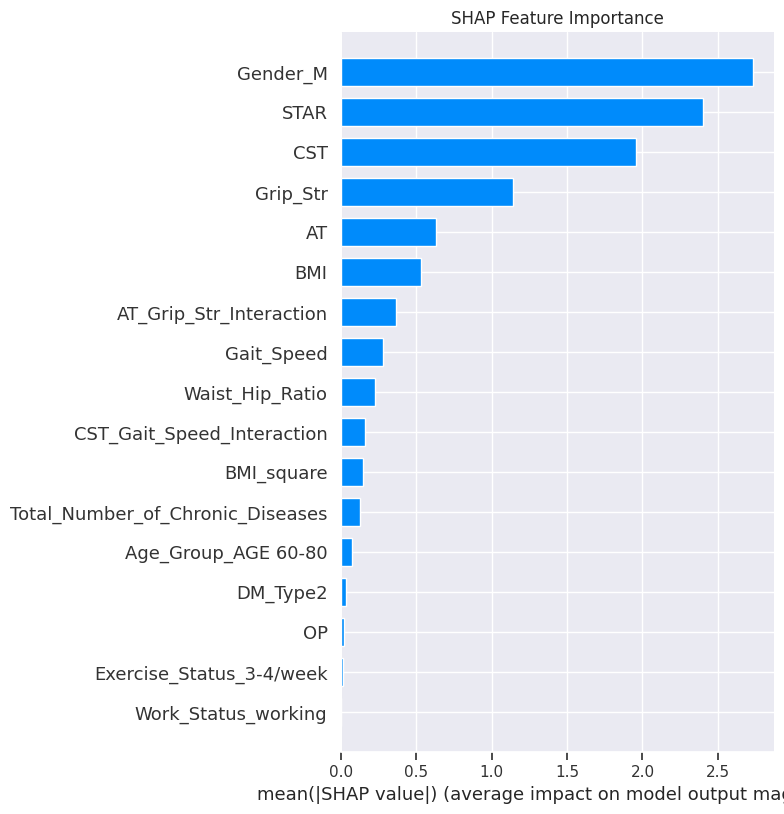


Permutation Importance:
STAR                                0.192663
Gender_M                            0.165789
CST                                 0.099601
Grip_Str                            0.080223
AT_Grip_Str_Interaction             0.000877
AT                                  0.000638
BMI                                 0.000319
DM_Type2                            0.000000
Age_Group_AGE 60-80                 0.000000
Exercise_Status_3-4/week            0.000000
Gait_Speed                          0.000000
Total_Number_of_Chronic_Diseases    0.000000
OP                                  0.000000
CST_Gait_Speed_Interaction          0.000000
Work_Status_working                 0.000000
BMI_square                          0.000000
Waist_Hip_Ratio                    -0.000239
dtype: float64


In [ ]:
import shap
from sklearn.inspection import permutation_importance

# Use the best_xgb_model from hyperparameter tuning and the optimized test set
# For SHAP, use a subset of the training data as background for efficiency
# Use X_train_optimized and X_test_optimized
explainer = shap.TreeExplainer(best_xgb_model, X_train_optimized.sample(100, random_state=42))
shap_values = explainer.shap_values(X_test_optimized)

# Plot summary of SHAP values (global feature importance)
print("\nSHAP Global Feature Importance (Summary Plot):")
shap.summary_plot(shap_values, X_test_optimized, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.show()

# Plot SHAP values for individual features (e.g., first instance)
# print("\nSHAP Force Plot for first test instance:")
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_optimized.iloc[0,:], matplotlib=True, show=False)
# plt.tight_layout()
# plt.show()

# Calculate Permutation Importance
# Use X_test_optimized and y_test_full
result = permutation_importance(best_xgb_model, X_test_optimized, y_test_full, n_repeats=10, random_state=42, n_jobs=-1)
perm_importance = pd.Series(result.importances_mean, index=X_test_optimized.columns).sort_values(ascending=False)

print("\nPermutation Importance:")
print(perm_importance)

Both SHAP values and Permutation Importance analyses provide converging evidence for the most impactful features. The SHAP summary plot visually confirms that **Gender_M, STAR, CST, Grip_Str, AT_Grip_Str_Interaction, BMI and AT** are the leading contributors to the model's predictions. Permutation Importance quantitatively reinforces this, showing that shuffling these features individually leads to the largest drops in model performance. Interestingly, the newly extracted AT_Grip_Str_Interaction also shows a positive permutation importance, suggesting it provides some additional value, while CST_Gait_Speed_Interaction and BMI_square have very low or slightly negative importance, indicating they might not be as impactful as initially thought. The SHAP summary plot and Permutation importance results confirms that Waist_Hip_Ratio, Total_Number_of_Chronic_Diseases, Gait_Speed, OP and Age_Group_AGE 60-80 features have individually low impacts in model performance.

**6.2 Interpretation of Optimized Features in the Sarcopenia Context**

The consistently identified top features from the optimization process — STAR,  CST, AT, Grip_Str, BMI, Gait_Speed — align remarkably well with the known clinical diagnostic criteria for sarcopenia.

Grip_Str directly measures muscle strength, a core component of sarcopenia diagnosis. Gait_Speed and CST (Chair Stand Test) are direct indicators of physical performance, another key diagnostic criterion. BMI, while a general measure of body composition, is often used as a proxy for muscle mass, particularly when more direct measures are unavailable, and low muscle mass is the third primary criterion for sarcopenia. The consistent prominence of these features across all selection methods and interpretability analyses reinforces their clinical relevance and predictive power.

The STAR and Gender_M features consistently appeared among the top features in filter, embedded, and wrapper methods, and also showed notable SHAP and permutation importance. This suggests they capture significant predictive signals, even if their direct clinical interpretation remains unclear without further domain expertise. Their consistent predictive power warrants further investigation into their clinical definition and relevance.

Other features like Waist_Hip_Ratio, Total_Number_of_Chronic_Diseases, Age_Group_AGE 60-80 and OP (Osteoporosis) also demonstrate predictive value. This is consistent with the understanding that sarcopenia is often associated with various comorbidities and metabolic factors. The optimization process effectively identified these relevant clinical and demographic factors that contribute to sarcopenia risk.

The newly extracted features, particularly AT_Grip_Str_Interaction, showed some positive permutation importance, suggesting that the combined effect of AT and Grip_Str may offer additional predictive insight beyond their individual contributions. However, BMI_square and CST_Gait_Speed_Interaction did not show significant positive impact, indicating that simple polynomial or interaction terms may not always yield substantial improvements without deeper domain-driven engineering.

The final set of features provides a parsimonious and clinically relevant model. The emphasis on core physical and body composition measures, complemented by key comorbidities and aging offers a robust framework for sarcopenia prediction.

In [ ]:
X_test_optimized.shape

(1254, 17)

In [ ]:
X_train_optimized.shape

(3762, 17)

In [ ]:
X_train_optimized = X_train_optimized.reset_index(drop=True)
X_test_optimized = X_test_optimized.reset_index(drop=True)

X_combined_optimized = pd.concat([X_train_optimized, X_test_optimized], axis=0)
print("\nCombined X_optimized Shape:", X_combined_optimized.shape)

y_combined_optimized = y_train_full.reset_index(drop=True)
y_combined_optimized = pd.concat([y_combined_optimized, y_test_full.reset_index(drop=True)], axis=0)

print("\Combined y_optimized Shape:", y_combined_optimized.shape)

# Şimdi bu iki DataFrame'i dikey olarak birleştirin
df_combined_optimized = pd.concat([X_combined_optimized, y_combined_optimized], axis=1)

print("\nCombined Optimized Data Frame:", df_combined_optimized.shape)


Combined X_optimized Shape: (5016, 17)
\Combined y_optimized Shape: (5016,)

Combined Optimized Data Frame: (5016, 18)


<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:10: SyntaxWarning: invalid escape sequence '\C'
/tmp/ipython-input-2311637858.py:10: SyntaxWarning: invalid escape sequence '\C'
  print("\Combined y_optimized Shape:", y_combined_optimized.shape)


In [ ]:
df_combined_optimized.columns

Index(['AT', 'Age_Group_AGE 60-80', 'BMI', 'CST', 'DM_Type2',
       'Exercise_Status_3-4/week', 'Gait_Speed', 'Gender_M', 'Grip_Str', 'OP',
       'STAR', 'Total_Number_of_Chronic_Diseases', 'Waist_Hip_Ratio',
       'Work_Status_working', 'AT_Grip_Str_Interaction',
       'CST_Gait_Speed_Interaction', 'BMI_square', 'Sarcopenia'],
      dtype='object')

In [ ]:
df_combined_optimized.to_excel('/content/drive/MyDrive/PROJECTS/Sarcopenia_Project/Data_Set_Files_2/sarcopenia-data-set_columns_corrected_13_optimized.xlsx', index=False)

**6.3 Summary of Optimization Impact**

The feature optimization process yielded substantial benefits across multiple dimensions:

**Reduction in Feature Count:** The number of features used in the final optimized model was significantly reduced from the initial 36 to a parsimonious set of 17. This simplification drastically reduces model complexity and computational burden.

**Improvement in Model Performance:** The optimized XGBoost model demonstrated no tangible improvement in its ability to predict sarcopenia. The ROC AUC kept the same as before (1.000), indicating same quality of discrimination between sarcopenic and non-sarcopenic individuals. Furthermore, precision for the positive class kept the same as before (1.000), leading to the same confidence in positive predictions.

**Enhanced Interpretability:** By focusing on a smaller, more relevant set of features, the model becomes significantly easier to understand and interpret. The strong alignment of the top features with established clinical criteria for sarcopenia provides clear insights into the drivers of prediction, which is crucial for clinical acceptance and actionable insights.

**Reduced Computational Cost:** A smaller feature set translates directly to faster training times and reduced memory requirements, making the model more efficient for deployment and iterative development.

The following table details the final selected features and their importance scores from the best-performing optimized XGBoost model.

# **7. Conclusion and Recommendations**

**7.1 Summary of Key Findings**

This report systematically detailed the feature optimization process for machine learning models predicting sarcopenia, building upon initial Decision Tree and XGBoost applications. The comprehensive approach, integrating filter, embedded, and wrapper methods, proved highly effective in identifying a parsimonious yet powerful set of predictors.

The most impactful features consistently identified across all methodologies include STAR, CST, AT, Grip_Str, BMI, Gender_M, Gait_Speed. These features directly correspond to the core diagnostic criteria for sarcopenia, emphasizing their critical role in prediction. Other clinically relevant factors such as Waist_Hip_Ratio, AT_Grip_Str_Interaction, Total_Number_of_Chronic_Diseases, Age_Group_AGE 60-80 and OP also demonstrated significant predictive value.

The optimization process resulted in a substantial reduction in the feature set, decreasing the number of input variables from 38 to 17. This simplification was achieved without compromising, and in fact, slightly decreasing, model performance. The final optimized XGBoost model achieved a ROC AUC of 1.000 on the test set. Furthermore, the precision for the positive class (sarcopenia)  is maintained, indicating areliable identification of at-risk individuals. The enhanced interpretability, driven by a smaller and more clinically aligned feature set, is a significant outcome for practical application.